In [1]:
!pip install plotly
!pip install dash # Developed for building reactive web applications, dashboard
!pip install wordcloud # Particularly useful in NLP for creating word clouds to visualize word importance
!pip install cufflinks # A library that works with the pandas library
!pip install missingno # For visualizing missing data


ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import missingno

# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected = True) # Initialize to display inline, similar to %matplotlib inline

import plotly.graph_objs as go # Low-level interface for data visualization
import plotly.express as px # High-level interface for data visualization, requires fewer lines of code for complex visuals

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf # A library that works with the pandas library
cf.go_offline() # Enables offline plotting

# warnings
import warnings
warnings.filterwarnings("ignore") # Used to suppress unnecessary warnings in the code


In [3]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [4]:
df = timesData.iloc[:100, :]

In [5]:
import plotly.graph_objects as go

# Data
trace = go.Scatter(x=[1, 2, 3, 4], y=[10, 11, 12, 13])

# Layout
layout = go.Layout(title='Simple Line Chart', xaxis=dict(title='X Axis'), yaxis=dict(title='Y Axis'))

# Figure
fig = go.Figure(data=[trace], layout=layout)

# Plot
fig.show()


In [6]:
#plt.style.use("ggplot")
# creating trace 1

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",    # Determines the drawing mode for this scatter trace. If "mode=text", it displays text. 
                                       # "text" elements appear at the coordinates. Otherwise, "text" elements appear when hovering over the points.
                                       # If there are fewer than 20 points and the trace is not stacked, the default is "lines+markers". Otherwise, "lines".
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star",
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)

data = [trace1, trace2]

layout = dict(title = "Citation and Teaching vs Work Rank of Top 100 Universities", # Think of this as axes
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = data, layout = layout)  # We pass the graph variables and layout parameters defined above into the figure as a dict,
iplot(fig)                                # and we plot it with iplot(fig).


In [7]:
# Filtering the data to include the top 100 universities' citation counts for the years 2014, 2015, and 2016.
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

# creating trace 1
trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = "rgb(255,128,255)"),
                    text = df2014.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = "rgb(255,128,2)"),
                    text = df2015.university_name)
# creating trace 3
trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "green"),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]

layout = dict(title = "Citation vs Work Rank of Top 100 Universities with 2014, 2015, 2016",title_x = 0.5, title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))

fig = dict(data = data, layout = layout)
iplot(fig)

In [8]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [9]:
# First, we take the data for the year 2016 and select the first 7 records.
df2016 = timesData[timesData.year == 2016].iloc[:7, :]

# We take the num_students column, remove commas, and convert the string to float.
df = df2016.num_students
df1 = (df.str.replace(",", "")).astype("float")
df2 = list((df.str.replace(",", "")).astype("float"))

# Using list comprehension, we convert the values in the num_students column to float.
pie_list = [float(each.replace(",", "")) for each in df2016.num_students]

# We assign labels to the slices of the pie chart using the labels variable.
labels = df2016.university_name

# We create the Figure object.
fig = {
    "data": [
        {
            "values": pie_list,  # Values that determine the percentage slices.
            "labels": labels,  # Label for each slice.
            "domain": {"x": [0, .5]},  # Position on the graph.
            "name": "Number Of Students Rates",  # Name of the chart.
            "hoverinfo": "label + percent",  # Information shown when hovering over a slice.
            "hole": .2,  # Size of the hole in the middle, making it a donut chart.
            "type": "pie",  # Type of chart.
            "pull": [0, 0, 0, 0, 0, 0.2, 0.2]  # We pull certain slices to highlight them, here the last two slices are pulled.
        },
    ],
    "layout": {
        "title": "Universities Number of Students Rates",  # Main title.
        "annotations": [
            {"font": {"size": 20},  # Font size.
             "text": "Number of Students",  # Annotation text.
             "x": 0.3,  # X position.
             "y": 1  # Y position.
            },
        ]
    }
}

# We render the created Figure object.
iplot(fig)


In [10]:
df2016 = timesData[timesData.year == 2016].iloc[:20, :]  # Select the top 20 universities in the world for the year 2016

num_students_size = [float(each.replace(",", ".")) for each in df2016.num_students]  # Convert the num_students column to float

international_color = [float(each) for each in df2016.international]  # Convert the international column to float

data = [  # Define the data for creating a scatter plot
    {
        "y": df2016.teaching,  # Use the teaching column for the y-axis
        "x": df2016.world_rank,  # Use the world_rank column for the x-axis
        "mode": "markers",  # Use markers mode for the scatter plot
        "marker": {  # Set marker properties
            "color": international_color,  # Set marker color using the international_color list
            "size": num_students_size,  # Set marker size using the num_students_size list
            "showscale": True  # Display the color scale
        },
        "text": df2016.university_name  # Display the university name for each marker
    }
]
iplot(data)  # Plot the graph


In [11]:
# 1. Assigns the student-staff ratio for the year 2011 to the variable x2011.
x2011 = timesData.student_staff_ratio[timesData.year == 2011]

# 2. Assigns the student-staff ratio for the year 2012 to the variable x2012.
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

# 3. Creates a histogram for the year 2011.
trace1 = go.Histogram(
    x=x2011,  # Assigns the variable x2011 to the X-axis.
    opacity=0.75,  # Sets the transparency of the histogram.
    name = "2011",  # Sets the name of the histogram.
    marker=dict(color='rgba(171, 50, 96, 0.6)')  # Sets the color of the histogram.
)

# 4. Creates another histogram for the year 2012.
trace2 = go.Histogram(
    x=x2012,  # Assigns the variable x2012 to the X-axis.
    opacity=0.75,  # Sets the transparency of the histogram.
    name = "2012",  # Sets the name of the histogram.
    marker=dict(color='rgba(12, 50, 196, 0.6)')  # Sets the color of the histogram.
)

# 5. Puts both histograms into a data list.
data = [trace1, trace2]

# 6. Sets up the layout and titles for the chart.
layout = go.Layout(
    barmode='overlay',  # Allows the two histograms to overlap.
    title='Students-Staff Ratio in 2011 and 2012',  # Sets the title of the chart.
    xaxis=dict(title='Students-Staff Ratio'),  # Sets the title for the X-axis.
    yaxis=dict(title='Count')  # Sets the title for the Y-axis.
)

# 7. Creates a Figure object using the data and layout.
fig = go.Figure(data=data, layout=layout)

# 8. Plots the created Figure object.
iplot(fig)


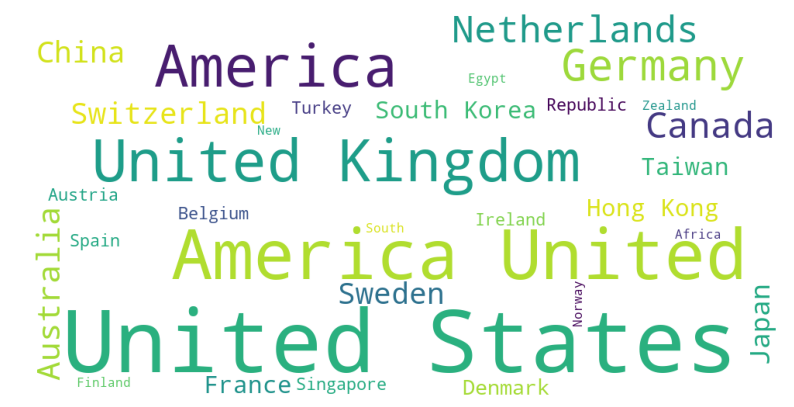

In [12]:
# 1. Assigns the countries for the year 2011 to the x2011 variable.
x2011 = timesData.country[timesData.year == 2011]

# 2. Creates a subplot with dimensions 10x10.
plt.subplots(figsize = (10, 10))

# 3. Generates a word cloud by combining the countries in the x2011 variable.
wordcloud = WordCloud(
    background_color= "white",  # Sets the background color of the word cloud to white.
    width = 1000,  # Sets the width of the word cloud.
    height= 500  # Sets the height of the word cloud.
).generate(" ".join(x2011))

# 4. Displays the generated word cloud.
plt.imshow(wordcloud)

# 5. Turns off the axes of the plot so that only the word cloud is visible.
plt.axis("off")

# 6. Saves the plot to your computer as "graph.png".
plt.savefig("graph.png")

# 7. Shows the plot on the screen.
plt.show()


In [13]:
# 1. Assigns the data for the year 2015 to the variable x2015.
x2015 = timesData[timesData.year == 2015]

# 2. Creates a Box Plot using the x2015.total_score data.
trace0 = go.Box(
    y=x2015.total_score,  # Specifies the data to be shown on the y-axis of the Box Plot.
    name = 'total score of universities in 2015',  # Specifies the name of the plot.
    marker = dict(color = 'rgb(12, 12, 140)')  # Specifies the color of the plot.
)

# 3. Creates a Box Plot using the x2015.research data.
trace1 = go.Box(
    y=x2015.research,  # Specifies the data to be shown on the y-axis of the Box Plot.
    name = 'research of universities in 2015',  # Specifies the name of the plot.
    marker = dict(color = 'rgb(12, 128, 128)')  # Specifies the color of the plot.
)

# 4. Gathers the created Box Plots into a list.
data = [trace0, trace1]

# 5. Plots the created Box Plots.
iplot(data)


In [15]:
# 1. Imports the figure_factory module from Plotly.
import plotly.figure_factory as ff

# 2. Assigns the data for the year 2015 to the variable dataframe.
dataframe = timesData[timesData.year == 2015]

# 3. Selects specific columns from the dataframe variable and assigns them to the variable data2015.
data2015 = dataframe.loc[:,["research","international", "total_score"]]

# 4. Adds a new "index" column to the data2015 DataFrame and assigns sequential numbers to this column.
data2015["index"] = np.arange(1,len(data2015)+1)

# 5. Creates a scatter plot matrix using the data2015 data.
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index', colormap='Portland',
                                  colormap_type='cat', height=700, width=700)

# 6. Plots the created scatter plot matrix.
iplot(fig)


In [16]:
import plotly.express as px  # Imports the Plotly Express library.
df = px.data.gapminder()  # Loads the Gapminder dataset into the df variable.

# Creates a scatter plot using the px.scatter function. 
# In this plot, GDP per Capita is on the x-axis, 
# and Life Expectancy is on the y-axis.
# The animation_frame adds animation based on years, 
# while animation_group sets the countries as animation groups.
# The size parameter adjusts the size of the points based on the country's population.
# The color parameter colors the points based on their continent.
# The hover_name shows the country name when hovering over the points.
# log_x=True applies a logarithmic scale to the x-axis.
# size_max=55 sets the maximum size of the points.
# range_x and range_y set the value ranges for the x and y axes, respectively.
px.scatter(df, 
           x="gdpPercap",
           y="lifeExp",
           animation_frame="year",
           animation_group="country",
           size="pop",
           color="continent",
           hover_name="country",
           log_x=True,
           size_max=55,
           range_x=[100,100000],
           range_y=[25,90])
